In [1]:
import os
import shutil

# 정리할 폴더 경로
folder_paths = [
    'C:\\Users\\ohbok\\Taipy\\sparc-malfunction-classification-develop\\src\\.taipy',
    'C:\\Users\\ohbok\\Taipy\\sparc-malfunction-classification-develop\\src\\user_data'
]

for path in folder_paths:
    # 폴더가 존재하는지 확인
    if os.path.exists(path) and os.path.isdir(path):
        try:
            # 폴더 하위의 모든 항목을 순회하며 삭제
            for item in os.listdir(path):
                item_path = os.path.join(path, item)
                if os.path.isdir(item_path):
                    # 하위 폴더인 경우 shutil.rmtree로 삭제
                    shutil.rmtree(item_path)
                else:
                    # 파일인 경우 os.remove로 삭제
                    os.remove(item_path)
            print(f"폴더 '{path}'의 하위 내용이 성공적으로 삭제되었습니다.")
        except OSError as e:
            print(f"폴더 '{path}'의 하위 내용 삭제 중 오류가 발생했습니다: {e}")
    else:
        print(f"폴더 '{path}'가 존재하지 않거나 디렉토리가 아닙니다.")

폴더 'C:\Users\ohbok\Taipy\sparc-malfunction-classification-develop\src\.taipy'의 하위 내용이 성공적으로 삭제되었습니다.
폴더 'C:\Users\ohbok\Taipy\sparc-malfunction-classification-develop\src\user_data'의 하위 내용이 성공적으로 삭제되었습니다.


In [2]:
# 데이터 처리 및 기타 작업을 위한 라이브러리들을 불러옵니다.
import pandas as pd                                         # 데이터프레임 구조를 다루는 데 필수적인 라이브러리
import numpy as np                                          # 숫자 연산을 위한 라이브러리
import datetime as dt                                       # 날짜와 시간을 다루는 라이브러리
import json                                                 # JSON 형식의 데이터를 처리하는 라이브러리

import optuna
import pprint

import taipy as tp
from taipy import Config, Orchestrator, Gui

In [3]:
# # Ensure the orchestrator is stopped before modifying the configuration
# tp.Orchestrator().stop()
# Config.configure_job_executions(mode="standalone", max_nb_of_workers=2)

In [4]:
from config.config import scenario_cfg

In [5]:
tp.Orchestrator().stop()
tp.Orchestrator().run()

[2025-08-21 08:30:01.630][Taipy][INFO] Unblocking configuration update...
[2025-08-21 08:30:01.631][Taipy][INFO] Stopping job dispatcher...
[2025-08-21 08:30:01.631][Taipy][INFO] Orchestrator service has been stopped.
[2025-08-21 08:30:01.631][Taipy][INFO] Updating configuration with command-line arguments...
[2025-08-21 08:30:01.633][Taipy][INFO] Managing application's version...
[2025-08-21 08:30:01.640][Taipy][INFO] Development mode: Clean all entities of version b270ec97-52de-4def-96e9-7bfbe407951a
[2025-08-21 08:30:01.661][Taipy][INFO] Checking application's version...
[2025-08-21 08:30:01.664][Taipy][INFO] Blocking configuration update...
[2025-08-21 08:30:01.664][Taipy][INFO] Starting job dispatcher...
[2025-08-21 08:30:01.667][Taipy][INFO] Orchestrator service has been started.


In [6]:
from algos.algos import *

In [7]:
# 디렉토리 변경
# import os
# import subprocess

# # # 파일이 위치한 디렉토리로 이동
# # # 'c:\\my_project'와 같은 경로를 자신의 파일 경로로 바꿔주세요.
# # os.chdir('/usr01/automl/sparc-malfunction-classification-develop/src/config')
# os.chdir('/usr01/automl/sparc-malfunction-classification-develop/src')


In [8]:
# # 'my_script.py' 파일 실행
# # 이 명령어는 Windows의 경우입니다.
# # MacOS나 Linux에서는 'python my_script.py'로 실행할 수 있습니다.
# subprocess.run(['python', 'config.py'])

# # # 특정 경로를 직접 지정하여 실행
# # # 이 방법은 현재 작업 디렉토리를 바꾸지 않고 파일을 실행할 수 있습니다.
# # subprocess.run(['python', 'C:\\Users\\your_name\\Documents\\my_project\\my_script.py'])

In [9]:
# Config.load(r"/usr01/automl/sparc-malfunction-classification-develop/src/config/config.toml")
# scenario_cfg = Config.scenarios["churn_classification"]

scenario_1 = tp.create_scenario(scenario_cfg)

TypeError: Object of type function is not JSON serializable

In [ ]:
train_parameters_default = scenario_1.train_parameters_list_default.read()
# pprint.pprint(train_parameters_default)

In [115]:
initial_dataset = scenario_1.initial_dataset.read()

In [116]:
print(initial_dataset.shape)
# initial_dataset

(4536, 1625)


In [117]:
task = scenario_1.preprocess_dataset
# task.submit(wait=True, timeout=50)
task.submit(wait=True)

[2025-08-20 10:46:07.220][Taipy][INFO] job JOB_preprocess_dataset_6026e6d0-18a9-4b40-aea7-616d16a18aed is completed.


In [118]:
preprocessed_dataset = scenario_1.preprocessed_dataset.read()

In [119]:
print(preprocessed_dataset.shape)
preprocessed_dataset

(4536, 1400)


,X,Y,Radius,AC_GAIN_32 of 1103959_69_1133529_cp1_cp1p5_YPP,AC_GAIN_32 of 1103959_69_1133529_cp1_cp1p5_YPP_QPP_RPP,AC_GAIN_32 of 1103959_69_1133529_cp1p5,AC_GAIN_32 of 1103959_69_1133592_QPP,AC_OFFCALRES of 1103959_69_1133529_cp1,AC_OFFCALRES of 1103959_69_1133529_cp1_cp1p5_YPP,AC_OFFCALRES of 1103959_69_1133529_cp1_cp1p5_YPP_QPP_RPP,...,FAILING_BINOUTS(1) of 1103959_69_1133592_QPP_SbPo,FAILING_BINOUTS(1) of 1103959_69_1133592_QPP_SbPoPo,FAILING_BINOUTS(1) of 1103959_69_1133592_QPP_SbSbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_GbGbSbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_GbGbSbSbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_GbPoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_PoPo,FAILING_BINOUTS(1) of 1103959_69_JPP_SbPoPo,band gap dpat_ok for band gap,Pass/Fail
0,17,35,38.910153,43,43,43,43,-1.383300,0.7902,-0.6173,...,False,False,False,False,False,False,False,False,False,0
1,19,38,42.485292,43,43,43,43,-1.040700,1.1117,-0.5666,...,False,False,False,False,False,False,True,False,True,0
2,-7,63,63.387696,43,43,43,43,-0.357600,0.4747,-1.7413,...,False,False,False,False,False,False,True,False,False,0
3,13,70,71.196910,43,43,43,43,-0.283700,1.3564,0.0879,...,False,False,False,False,False,False,True,False,True,0
4,33,57,65.863495,43,43,43,43,0.517600,-0.8841,0.2653,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,31,63,70.213959,37,37,37,37,-0.938794,0.6007,-0.2379,...,True,False,False,False,False,False,False,False,True,0
4532,-7,29,29.832868,37,37,37,37,-0.938794,-0.4816,-1.2372,...,True,False,False,False,False,False,False,False,True,0
4533,20,32,37.735925,37,37,37,37,-0.938794,-0.3647,-1.1333,...,True,False,False,False,False,False,False,False,True,0
4534,35,60,69.462220,37,37,37,37,-0.938794,0.4597,-1.6026,...,True,False,False,False,False,False,False,False,True,0


In [120]:
task = scenario_1.create_train_and_test_data
# task.submit(wait=True, timeout=300)
task.submit(wait=True)

[2025-08-20 10:46:28.609][Taipy][INFO] job JOB_create_train_and_test_data_a4727306-2cfe-43ef-b171-10a53422aefe is completed.


In [121]:
train_dataset = scenario_1.train_dataset.read()
print(train_dataset.shape)
test_dataset = scenario_1.test_dataset.read()
print(test_dataset.shape)

(3617, 790)
(905, 790)


In [122]:
# train_dataset

In [123]:
split_parameter_info = scenario_1.split_parameter_info.read()
pprint.pprint(split_parameter_info)

{'apply_feature_generation': False,
 'apply_filter_gen': True,
 'apply_filter_split': True,
 'class_distribution_before_sampling': {'0': 3546, '1': 71},
 'corr_threshold_gen': 0.1,
 'corr_threshold_split': 0.98,
 'diff_features': True,
 'features_after_generation': 789,
 'features_after_split_filter': 789,
 'features_before_split_filter': 1399,
 'features_dropped_by_correlation_split': 608,
 'features_dropped_by_variance_split': 2,
 'final_train_feature_count': 789,
 'generated_feature_counts': {'diff': 0, 'poly': 0, 'sum': 0},
 'original_feature_count': 789,
 'poly_degree': 2,
 'poly_features': True,
 'random_state': 42,
 'rows_after_outlier_removal': 4522,
 'sampling_applied': 'None',
 'sampling_ratio': None,
 'sum_features': True,
 'test_samples': 905,
 'test_size': 0.2,
 'total_generated_features': 0,
 'train_samples_after_sampling': 3617,
 'train_samples_before_sampling': 3617,
 'var_threshold_gen': 0.0,
 'var_threshold_split': 0.0}


In [124]:
feature_selector = scenario_1.feature_selector.read()
pprint.pprint(feature_selector)

{'correlation_filter': {'threshold': 0.08},
 'f2_scorer': {'beta': 4, 'name': 'fbeta_score', 'pos_label': 1},
 'feature_selector_name': 'CorrelationsClassifier',
 'variance_threshold_filter': {'threshold': 0}}


In [125]:
task = scenario_1.select_feature
task.submit(wait=True)

[2025-08-20 10:46:31.849][Taipy][INFO] job JOB_select_feature_87bbcfc8-fdb4-4cda-9a3b-b6eeee63ea8c is completed.


In [126]:
feature_selection_info = scenario_1.feature_selection_info.read()
pprint.pprint(feature_selection_info)
# pprint.pprint(feature_selection_info.get('final_feature_count'))

{'correlation_filter': {'threshold': 0.08},
 'f2_scorer': {'beta': 4, 'name': 'fbeta_score', 'pos_label': 1},
 'feature_selector_name': 'CorrelationsClassifier',
 'final_feature_count': 6,
 'final_features': ['Radius',
                    'SensorOffsetHot-Cold',
                    'band gap dpat_ok for band gap',
                    'AC_SENSE_CRN 2 of 1103959_69_1133592_RPP',
                    'AC_V_AFE_CRN_5_8_8_P_F 2 of 1103959_69_1133592_RPP',
                    'FAILING_BINOUTS(1) of '
                    '1103959_69_1133529_cp1_cp1p5_YPP_GbSbPoPo'],
 'initial_feature_count': 789,
 'variance_threshold_filter': {'threshold': 0}}


### TASKS train_model

In [127]:
task = scenario_1.train_model_baseline
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_baseline = scenario_1.trained_model_baseline.read()
print(trained_model_baseline)
feature_importance_baseline = scenario_1.feature_importance_baseline.read()
print(feature_importance_baseline.shape)

[2025-08-20 10:46:34.321][Taipy][INFO] job JOB_train_model_baseline_c40290d4-a6dc-4566-ae8a-5ccc5a393331 is completed.
(3, 3)


In [128]:
# train_parameters_logistic_regression = scenario_1.train_parameters_logistic_regression.read()
# train_parameters_logistic_regression

In [129]:
task = scenario_1.train_model_logistic_regression
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_logistic_regression = scenario_1.trained_model_logistic_regression.read()
print(trained_model_logistic_regression)
feature_importance_logistic_regression = scenario_1.feature_importance_logistic_regression.read()
print(feature_importance_logistic_regression.shape)

[2025-08-20 10:46:52.812][Taipy][INFO] job JOB_train_model_logistic_regression_59dd6bf1-5d48-4fa3-8cf6-bd768e51fd29 is completed.
LogisticRegression(C=0.0001, class_weight={0: 1, 1: 3546}, max_iter=1000,
                   random_state=42)
(6, 3)


In [130]:
# train_parameters_info_logistic_regression = scenario_1.train_parameters_info_logistic_regression.read()
# pprint.pprint(train_parameters_info_logistic_regression)

In [131]:
# trained_model_logistic_regression
# feature_importance_logistic_regression
# train_parameters_info_logistic_regression

테스트 

In [132]:
train_dataset = scenario_1.train_dataset.read()
# train_dataset

In [133]:
feature_selection_info = scenario_1.feature_selection_info.read()


In [134]:
# train_parameters_logistic_regression = scenario_1.train_parameters_logistic_regression.read()
# train_parameters = train_parameters_logistic_regression
# train_parameters

In [135]:
# train_parameters_random_forest = scenario_1.train_parameters_random_forest.read()
# train_parameters = train_parameters_random_forest
# train_parameters

In [136]:
task = scenario_1.train_model_random_forest
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_random_forest = scenario_1.trained_model_random_forest.read()
print(trained_model_random_forest)
feature_importance_random_forest = scenario_1.feature_importance_random_forest.read()
print(feature_importance_random_forest.shape)

[2025-08-20 10:47:33.249][Taipy][INFO] job JOB_train_model_random_forest_71950f02-8250-4a94-b00e-ea8e5e18fa80 is completed.
RandomForestClassifier(class_weight={0: 1, 1: 2266}, max_depth=10,
                       min_samples_leaf=2, min_samples_split=9,
                       n_estimators=279, n_jobs=-1, random_state=42)
(6, 3)


In [137]:
task = scenario_1.train_model_xgboost
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
trained_model_xgboost = scenario_1.trained_model_xgboost.read()
print(trained_model_xgboost)
feature_importance_xgboost = scenario_1.feature_importance_xgboost.read()
print(feature_importance_xgboost.shape)

[2025-08-20 10:47:46.999][Taipy][INFO] job JOB_train_model_xgboost_a4ec1b28-33e3-42a4-91bd-47b4cfb7760c is completed.
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8199949501193615, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=0.19284502645261706, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03309017315502753,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=142, n_jobs=-1,
              num_parallel_tree=None, ...)
(6, 3)


### TASKS predict_the_test_data

In [138]:
task = scenario_1.predict_the_test_data_baseline
# task.submit(wait=True, timeout=50)
task.submit(wait=True, timeout=1)
forecast_dataset_baseline = scenario_1.forecast_dataset_baseline.read()
print(forecast_dataset_baseline)
shap_values_baseline = scenario_1.shap_values_baseline.read()


[2025-08-20 10:47:50.786][Taipy][INFO] job JOB_predict_the_test_data_baseline_d23713ca-a1ce-4cee-b0ae-939fdde487be is completed.
[1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1

In [139]:
# forecast_dataset_baseline

In [140]:
# shap_values_baseline이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_baseline을 사용하세요.
# shap_values_baseline = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_baseline[0], type(None)):
    print(type(shap_values_baseline[0]))
    print(shap_values_baseline[1].shape)
else:
    shap.summary_plot(shap_values_baseline[0], shap_values_baseline[1])

<class 'NoneType'>
(905, 789)


In [141]:
task = scenario_1.predict_the_test_data_logistic_regression
# task.submit(wait=True, timeout=50)
task.submit(wait=True)
forecast_dataset_logistic_regression = scenario_1.forecast_dataset_logistic_regression.read()

[2025-08-20 10:47:53.771][Taipy][INFO] job JOB_predict_the_test_data_logistic_regression_193fc0d9-410a-4383-b087-f96db44373f6 is completed.


In [142]:
print(forecast_dataset_logistic_regression)
shap_values_logistic_regression = scenario_1.shap_values_logistic_regression.read()


[0.96652308 0.97546647 0.987475   0.99009564 0.98729046 0.98487181
 0.96647488 0.98584418 0.97814583 0.99314315 0.98705133 0.99163749
 0.99127178 0.99330266 0.97835269 0.99201088 0.9687417  0.99246018
 0.98669081 0.98393982 0.98706646 0.9848296  0.9658048  0.99054558
 0.96868569 0.97334799 0.98908988 0.98359631 0.97252839 0.98100469
 0.99005631 0.99008515 0.98813146 0.99087721 0.99121124 0.96999966
 0.98953349 0.9697678  0.97287593 0.9863808  0.9799264  0.98514023
 0.9682641  0.98544452 0.9849403  0.98527514 0.97877066 0.97796115
 0.98161339 0.98544873 0.97332263 0.97496652 0.96941072 0.9837394
 0.97333159 0.98909384 0.98355746 0.98904526 0.99222495 0.99234914
 0.97276301 0.99068031 0.99013541 0.98792867 0.99081571 0.97122483
 0.98387663 0.99114875 0.9905681  0.98776865 0.98963035 0.99073848
 0.95965523 0.98944921 0.9854884  0.97861857 0.99199542 0.99219985
 0.99023188 0.99133885 0.98367048 0.99252217 0.98141751 0.99143941
 0.98933958 0.9859319  0.99338439 0.9591297  0.98753713 0.98929

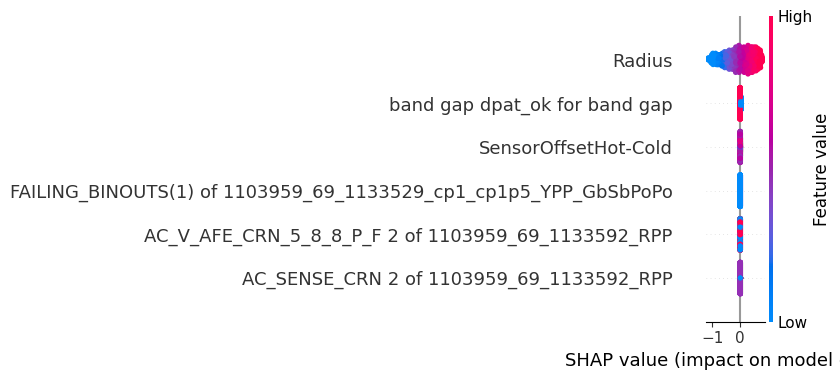

In [143]:

# shap_values_logistic_regression이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_logistic_regression을 사용하세요.
# shap_values_logistic_regression = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_logistic_regression[0], type(None)):
    print(type(shap_values_logistic_regression[0]))
    print(shap_values_logistic_regression[1].shape)
else:
    shap.summary_plot(shap_values_logistic_regression[0], shap_values_logistic_regression[1])

[2025-08-20 10:47:57.638][Taipy][INFO] job JOB_predict_the_test_data_random_forest_81797452-986b-4a3f-81e0-db603f188480 is completed.
[0.00705406 0.2123005  0.90449263 0.85877055 0.00704762 0.91207815
 0.00351105 0.92259459 0.71994038 0.20542294 0.00705406 0.86668903
 0.728774   0.18758533 0.67731854 0.70055589 0.00705406 0.00704762
 0.00704762 0.88404125 0.26868407 0.00351105 0.11667018 0.3008533
 0.11667018 0.11667018 0.87599437 0.75229252 0.21236021 0.00704762
 0.00351105 0.00704762 0.00351105 0.85801787 0.85869638 0.00705406
 0.64758652 0.00351105 0.21936569 0.89401195 0.00704762 0.00351105
 0.20520274 0.88692134 0.76890974 0.65224189 0.00351105 0.4112585
 0.80501178 0.00704762 0.20531104 0.00351105 0.11667018 0.82609689
 0.00351105 0.54051973 0.00704762 0.8970849  0.49936198 0.00704762
 0.00351105 0.00704762 0.88001187 0.47782711 0.83325355 0.00351105
 0.00351105 0.81875678 0.00704762 0.89017552 0.90507555 0.00351105
 0.22656095 0.78437317 0.00351105 0.47140486 0.00704762 0.014164

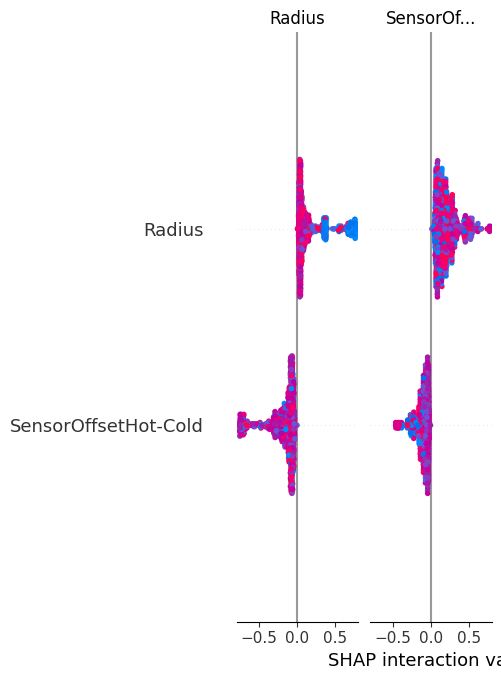

In [144]:
task = scenario_1.predict_the_test_data_random_forest
task.submit(wait=True, timeout=50)
forecast_dataset_random_forest = scenario_1.forecast_dataset_random_forest.read()
print(forecast_dataset_random_forest)
shap_values_random_forest = scenario_1.shap_values_random_forest.read()

# shap_values_random_forest이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_random_forest을 사용하세요.
# shap_values_random_forest = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_random_forest[0], type(None)):
    print(type(shap_values_random_forest[0]))
    print(shap_values_random_forest[1].shape)
else:
    shap.summary_plot(shap_values_random_forest[0], shap_values_random_forest[1])

[2025-08-20 10:48:00.950][Taipy][INFO] job JOB_predict_the_test_data_xgboost_0ed51a20-1920-44e1-9f67-104eeed65ebf is completed.
[0.00522921 0.02794502 0.6052715  0.49921328 0.01454977 0.72661
 0.00574416 0.67083335 0.5002809  0.23617464 0.01528755 0.7968653
 0.3279983  0.20195204 0.2811311  0.7061303  0.00642042 0.01085888
 0.01077207 0.7264816  0.11393851 0.01683944 0.02727142 0.24048044
 0.01473426 0.01674598 0.47971493 0.54810935 0.01612956 0.01706158
 0.01260744 0.0120816  0.01039799 0.3729526  0.35851392 0.00580451
 0.31692216 0.00622644 0.02513769 0.5135308  0.0187279  0.01643947
 0.02002742 0.57173085 0.48170593 0.5658294  0.00908948 0.3940273
 0.7138011  0.01294019 0.03409957 0.00494607 0.02443712 0.53136265
 0.00604628 0.21578026 0.01279699 0.47071034 0.7608066  0.0112316
 0.00595611 0.01093889 0.6561111  0.3858141  0.4100581  0.00466124
 0.01556004 0.441658   0.01212195 0.54412216 0.67597145 0.01300489
 0.03585959 0.5400849  0.01278628 0.2707616  0.01964096 0.01767
 0.5858742

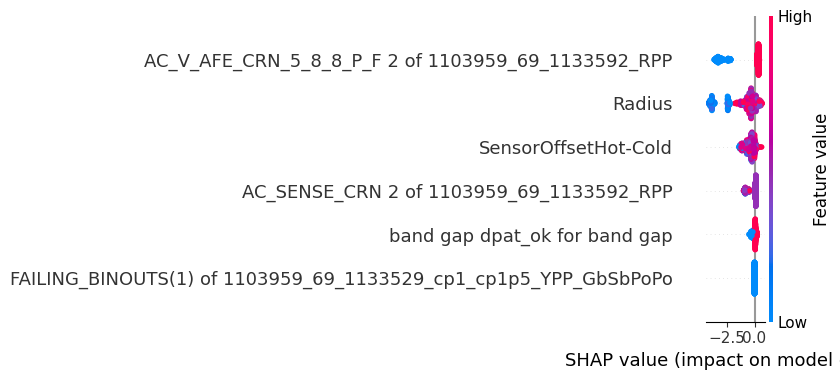

In [145]:
task = scenario_1.predict_the_test_data_xgboost
task.submit(wait=True, timeout=50)
forecast_dataset_xgboost = scenario_1.forecast_dataset_xgboost.read()
print(forecast_dataset_xgboost)
shap_values_xgboost = scenario_1.shap_values_xgboost.read()

# shap_values_xgboost이 NoneType인 경우를 테스트하기 위한 예시
# 아래 코드를 주석 처리하고 실제 shap_values_xgboost을 사용하세요.
# shap_values_xgboost = (None, np.random.rand(100, 5))
# 조건문
if isinstance(shap_values_xgboost[0], type(None)):
    print(type(shap_values_xgboost[0]))
    print(shap_values_xgboost[1].shape)
else:
    shap.summary_plot(shap_values_xgboost[0], shap_values_xgboost[1])

### TASKS find_best_threshold

In [146]:
task = scenario_1.find_best_threshold_baseline
task.submit(wait=True, timeout=50)
train_dataset_proba_baseline = scenario_1.train_dataset_proba_baseline.read()
print(train_dataset_proba_baseline.shape)
threshold_baseline = scenario_1.threshold_baseline.read()
print(threshold_baseline)

[2025-08-20 10:48:04.586][Taipy][INFO] job JOB_find_best_threshold_baseline_9e417713-f622-4c0e-b78f-f0c7001b623f is completed.
(3617, 792)
0.010101010101010102


In [147]:
task = scenario_1.find_best_threshold_logistic_regression
task.submit(wait=True, timeout=50)
train_dataset_proba_logistic_regression = scenario_1.train_dataset_proba_logistic_regression.read()
print(train_dataset_proba_logistic_regression.shape)
threshold_logistic_regression = scenario_1.threshold_logistic_regression.read()
print(threshold_logistic_regression)

[2025-08-20 10:48:08.805][Taipy][INFO] job JOB_find_best_threshold_logistic_regression_e129f75a-0bf9-4cbe-8603-dc997cf5993d is completed.
(3617, 792)
0.9797979797979799


In [148]:
task = scenario_1.find_best_threshold_random_forest
task.submit(wait=True, timeout=50)
train_dataset_proba_random_forest = scenario_1.train_dataset_proba_random_forest.read()
print(train_dataset_proba_random_forest.shape)
threshold_random_forest = scenario_1.threshold_random_forest.read()
print(threshold_random_forest)

[2025-08-20 10:48:12.321][Taipy][INFO] job JOB_find_best_threshold_random_forest_d8595e88-dcbd-4a76-adc0-dc4d9b61284a is completed.
(3617, 792)
0.8181818181818182


In [149]:
task = scenario_1.find_best_threshold_xgboost
task.submit(wait=True, timeout=50)
train_dataset_proba_xgboost = scenario_1.train_dataset_proba_xgboost.read()
print(train_dataset_proba_xgboost.shape)
threshold_xgboost = scenario_1.threshold_xgboost.read()
print(threshold_xgboost)

[2025-08-20 10:48:16.090][Taipy][INFO] job JOB_find_best_threshold_xgboost_9762972b-808e-4faf-adbf-5be467a71641 is completed.
(3617, 792)
0.6262626262626263


### TASKS roc

In [150]:
task = scenario_1.task_roc_baseline
task.submit(wait=True, timeout=50)
roc_data_baseline = scenario_1.roc_data_baseline.read()
print(roc_data_baseline.shape)
auc_score_baseline = scenario_1.auc_score_baseline.read()
print(auc_score_baseline)

[2025-08-20 10:48:18.756][Taipy][INFO] job JOB_task_roc_baseline_32967a30-801b-439c-89ab-8a93e23df731 is completed.
(101, 2)
0.5021295252411374


In [151]:
task = scenario_1.task_roc_logistic_regression
task.submit(wait=True, timeout=50)
roc_data_logistic_regression = scenario_1.roc_data_logistic_regression.read()
print(roc_data_logistic_regression.shape)
auc_score_logistic_regression = scenario_1.auc_score_logistic_regression.read()
print(auc_score_logistic_regression)

[2025-08-20 10:48:21.460][Taipy][INFO] job JOB_task_roc_logistic_regression_47c13678-df6c-44fb-a966-8bd646313715 is completed.
(101, 2)
0.5817988224978079


In [152]:
task = scenario_1.task_roc_random_forest
task.submit(wait=True, timeout=50)
roc_data_random_forest = scenario_1.roc_data_random_forest.read()
print(roc_data_random_forest.shape)
auc_score_random_forest = scenario_1.auc_score_random_forest.read()
print(auc_score_random_forest)

[2025-08-20 10:48:24.224][Taipy][INFO] job JOB_task_roc_random_forest_9fc50498-1b7c-4db2-a1af-44f86d78837a is completed.
(101, 2)
0.8253476136790681


In [153]:
task = scenario_1.task_roc_xgboost
task.submit(wait=True, timeout=50)
roc_data_xgboost = scenario_1.roc_data_xgboost.read()
print(roc_data_xgboost.shape)
auc_score_xgboost = scenario_1.auc_score_xgboost.read()
print(auc_score_xgboost)

[2025-08-20 10:48:26.939][Taipy][INFO] job JOB_task_roc_xgboost_9f1b478b-5fa4-41dc-909b-bdedb80e246c is completed.
(101, 2)
0.7815044469497683


### TASKS create_metrics_on_train

In [154]:
task = scenario_1.create_metrics_on_train_baseline
task.submit(wait=True, timeout=50)
train_dataset_metrics_baseline = scenario_1.train_dataset_metrics_baseline.read()
print(train_dataset_metrics_baseline.shape)

[2025-08-20 10:48:28.985][Taipy][INFO] job JOB_create_metrics_on_train_baseline_2adddebc-2cd5-413e-96b3-99918981941f is completed.
(3617, 794)


In [155]:
task = scenario_1.create_metrics_on_train_logistic_regression
task.submit(wait=True, timeout=50)
train_dataset_metrics_logistic_regression = scenario_1.train_dataset_metrics_logistic_regression.read()
print(train_dataset_metrics_logistic_regression.shape)

[2025-08-20 10:48:30.572][Taipy][INFO] job JOB_create_metrics_on_train_logistic_regression_b19bd409-91d9-4bb2-b301-275dff1ba0d7 is completed.
(3617, 794)


In [156]:
task = scenario_1.create_metrics_on_train_random_forest
task.submit(wait=True, timeout=50)
train_dataset_metrics_random_forest = scenario_1.train_dataset_metrics_random_forest.read()
print(train_dataset_metrics_random_forest.shape)


[2025-08-20 10:48:32.148][Taipy][INFO] job JOB_create_metrics_on_train_random_forest_9bb35a4e-d18b-4b0d-a38c-4be827c61b72 is completed.
(3617, 794)


In [157]:
task = scenario_1.create_metrics_on_train_xgboost
task.submit(wait=True, timeout=50)
train_dataset_metrics_xgboost = scenario_1.train_dataset_metrics_xgboost.read()
print(train_dataset_metrics_xgboost.shape)

[2025-08-20 10:48:33.800][Taipy][INFO] job JOB_create_metrics_on_train_xgboost_fa0a92e7-90a8-4407-ad1f-fca72ac39e10 is completed.
(3617, 794)


### TASKS task_create_metrics

In [158]:
task = scenario_1.task_create_metrics_baseline
task.submit(wait=True, timeout=1)
metrics_baseline = scenario_1.metrics_baseline.read()
for key, value in metrics_baseline.items(): print(f'{key}: {value}')

[2025-08-20 10:48:35.393][Taipy][INFO] job JOB_task_create_metrics_baseline_173933a2-0b63-49f1-96ac-ada3eea9100e is completed.
f1_score: 0.04
recall: 0.56
precision: 0.02
accuracy: 0.45
auc_score: 0.5
dict_ftpn: {'tp': np.int64(10), 'tn': np.int64(398), 'fp': np.int64(489), 'fn': np.int64(8)}
number_of_predictions: 905
number_of_good_predictions: 408
number_of_false_predictions: 497


In [159]:
task = scenario_1.task_create_metrics_logistic_regression
task.submit(wait=True, timeout=1)
metrics_logistic_regression = scenario_1.metrics_logistic_regression.read()
for key, value in metrics_logistic_regression.items(): print(f'{key}: {value}')

[2025-08-20 10:48:37.074][Taipy][INFO] job JOB_task_create_metrics_logistic_regression_7236391e-9425-4a4d-8e9b-decaea0fafd1 is completed.
f1_score: 0.05
recall: 0.94
precision: 0.03
accuracy: 0.29
auc_score: 0.58
dict_ftpn: {'tp': np.int64(17), 'tn': np.int64(242), 'fp': np.int64(645), 'fn': np.int64(1)}
number_of_predictions: 905
number_of_good_predictions: 259
number_of_false_predictions: 646


In [160]:
task = scenario_1.task_create_metrics_random_forest
task.submit(wait=True, timeout=1)
metrics_random_forest = scenario_1.metrics_random_forest.read()
for key, value in metrics_random_forest.items(): print(f'{key}: {value}')

[2025-08-20 10:48:38.645][Taipy][INFO] job JOB_task_create_metrics_random_forest_cad2e377-a110-42c2-994b-1c0fcc4ccce0 is completed.
f1_score: 0.13
recall: 0.56
precision: 0.07
accuracy: 0.85
auc_score: 0.83
dict_ftpn: {'tp': np.int64(10), 'tn': np.int64(760), 'fp': np.int64(127), 'fn': np.int64(8)}
number_of_predictions: 905
number_of_good_predictions: 770
number_of_false_predictions: 135


In [161]:
task = scenario_1.task_create_metrics_xgboost
task.submit(wait=True, timeout=1)
metrics_xgboost = scenario_1.metrics_xgboost.read()
for key, value in metrics_xgboost.items(): print(f'{key}: {value}')

[2025-08-20 10:48:40.291][Taipy][INFO] job JOB_task_create_metrics_xgboost_6df1e501-1136-44b0-b556-0ab1e57dd912 is completed.
f1_score: 0.06
recall: 0.17
precision: 0.03
accuracy: 0.89
auc_score: 0.78
dict_ftpn: {'tp': np.int64(3), 'tn': np.int64(799), 'fp': np.int64(88), 'fn': np.int64(15)}
number_of_predictions: 905
number_of_good_predictions: 802
number_of_false_predictions: 103


### TASKS task_create_results

In [162]:
task = scenario_1.task_create_results_baseline
task.submit(wait=True, timeout=1)
results_baseline = scenario_1.results_baseline.read()
print(results_baseline.shape)

[2025-08-20 10:48:41.851][Taipy][INFO] job JOB_task_create_results_baseline_f1fcc7c6-1062-4a56-9f8b-b4968b095296 is completed.
(905, 5)


In [163]:
task = scenario_1.task_create_results_logistic_regression
task.submit(wait=True, timeout=1)
results_logistic_regression = scenario_1.results_logistic_regression.read()
print(results_logistic_regression.shape)

[2025-08-20 10:48:43.400][Taipy][INFO] job JOB_task_create_results_logistic_regression_3b092f17-42dd-483d-8cf8-04471323f9e9 is completed.
(905, 5)


In [164]:
results_logistic_regression

,Id,Probability,Forecast,Historical,True/False/Positive/Negative
4373,0,0.97,0,0,True Pass (TN)
677,1,0.98,0,0,True Pass (TN)
57,2,0.99,1,0,False Fail (FP)
1344,3,0.99,1,0,False Fail (FP)
3835,4,0.99,1,0,False Fail (FP)
...,...,...,...,...,...
2898,900,0.99,1,0,False Fail (FP)
2366,901,0.98,1,0,False Fail (FP)
706,902,0.97,0,0,True Pass (TN)
805,903,0.99,1,0,False Fail (FP)


In [165]:
task = scenario_1.task_create_results_random_forest
task.submit(wait=True, timeout=1)
results_random_forest = scenario_1.results_random_forest.read()
print(results_random_forest.shape)

[2025-08-20 10:48:45.096][Taipy][INFO] job JOB_task_create_results_random_forest_ebeb8cd7-11a3-4add-a83b-d7c4a7013058 is completed.
(905, 5)


In [166]:
task = scenario_1.task_create_results_xgboost
task.submit(wait=True, timeout=1)
results_xgboost = scenario_1.results_xgboost.read()
print(results_xgboost.shape)

[2025-08-20 10:48:46.811][Taipy][INFO] job JOB_task_create_results_xgboost_c46b909f-d1b4-48a6-a98b-75c6d7ed2d18 is completed.
(905, 5)


In [167]:
# scenarios = tp.get_entities_by_config_id(tp.get_scenarios()[0])
# print(scenarios)
# scenario = scenarios[0]

In [168]:
# print_object_attributes(scenario)

In [169]:
# print(scenario.get_inputs())
# print(scenario.get_outputs())

In [170]:
# input_nodes = scenario.get_inputs()
# output_nodes = scenario.get_outputs()

In [171]:
# input_node_1 = list(input_nodes)[0]
# output_node_1 = list(output_nodes)[0]
# # output_node_1 = list(output_node_1)[0].read()


In [172]:
# list(output_nodes)[0]
# print_object_attributes(list(output_nodes)[0])

In [173]:
# for o_n in list(output_nodes):
#     # print(o_n._config_id )
#     if o_n._config_id.startswith('results_'): 
#         print(o_n._config_id)

# # o_n_1.read()

In [174]:
# print_object_attributes(input_node_1)

In [175]:
# print_object_attributes(output_node_1)

In [176]:
# for i in list(outputs):
#     a=i.read()
#     print(type(a))
    

In [177]:
# a = tp.get_entities_by_config_id(list(scenario_1.data_nodes)[0])

In [178]:
# a[0].read()

In [179]:
# for i in scenario_1.get_outputs(): print(i)

In [180]:
# list(scenario_1.data_nodes.keys())

In [181]:
# print([(s.name, s.get_outputs().read()) for s in tp.get_scenarios()])